# Importing Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Data Analysis with Titanic dataset

In [99]:
data = pd.read_csv("train.csv")

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df = pd.read_csv("test.csv")

In [102]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
data.shape

(891, 12)

In [105]:
data_train = data.copy()
df_test = data.copy()

# Here we'll explore features

In [106]:
data_train.isnull().sum()
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Plotting Countplot

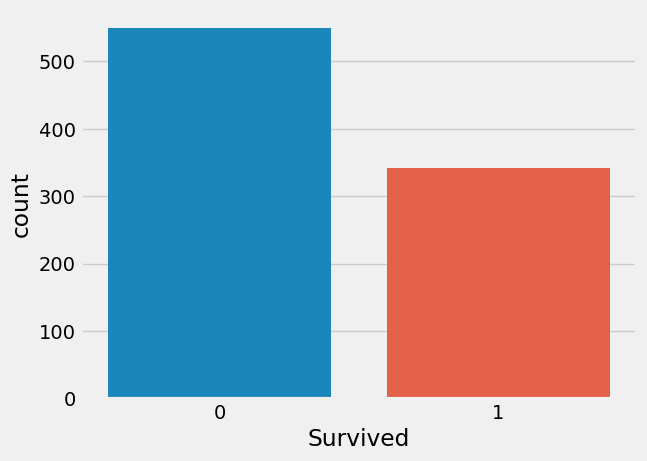

In [108]:
sns.countplot(x='Survived',data=data_train)
plt.show()

In [109]:
data_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

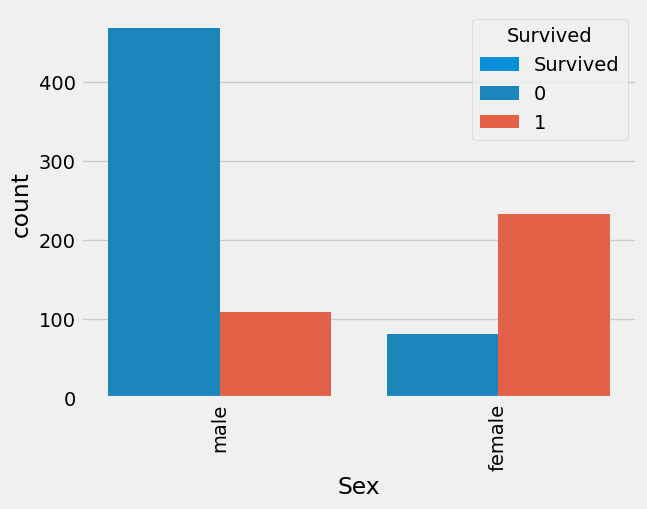

In [110]:
data_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex',hue='Survived',data=data_train,)
plt.show()

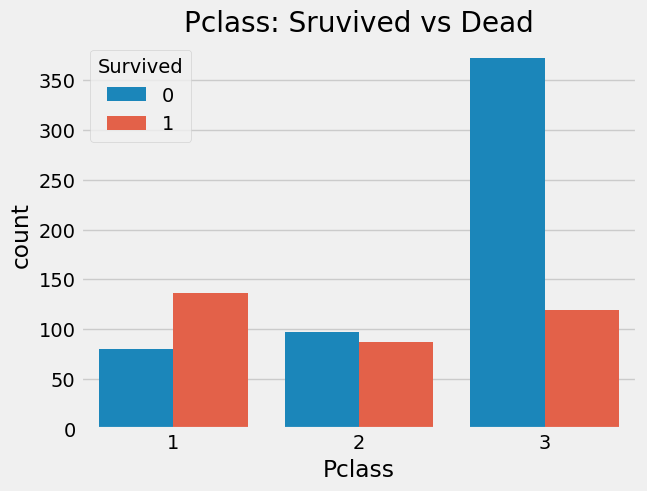

In [111]:
sns.countplot(x='Pclass', hue='Survived', data=data_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [112]:
pd.crosstab([data_train.Sex,data_train.Survived],data_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

# Plotting Catplot

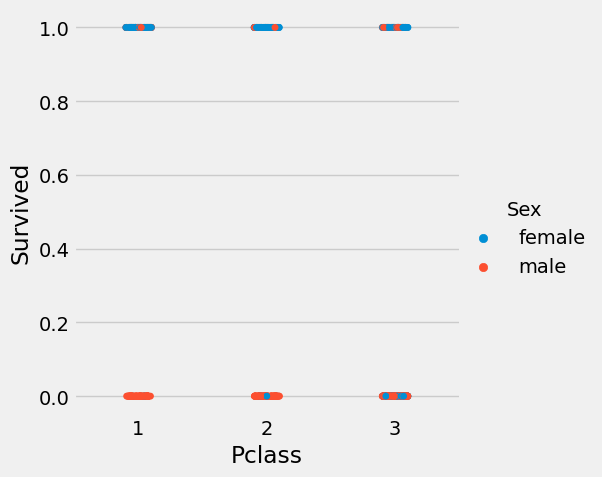

In [113]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data_train)
plt.show()

In [114]:
print('Oldest person Survived was of:',data_train['Age'].max())
print('Youngest person Survived was of:',data_train['Age'].min())
print('Average person Survived was of:',data_train['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


# Plotting Violinplot

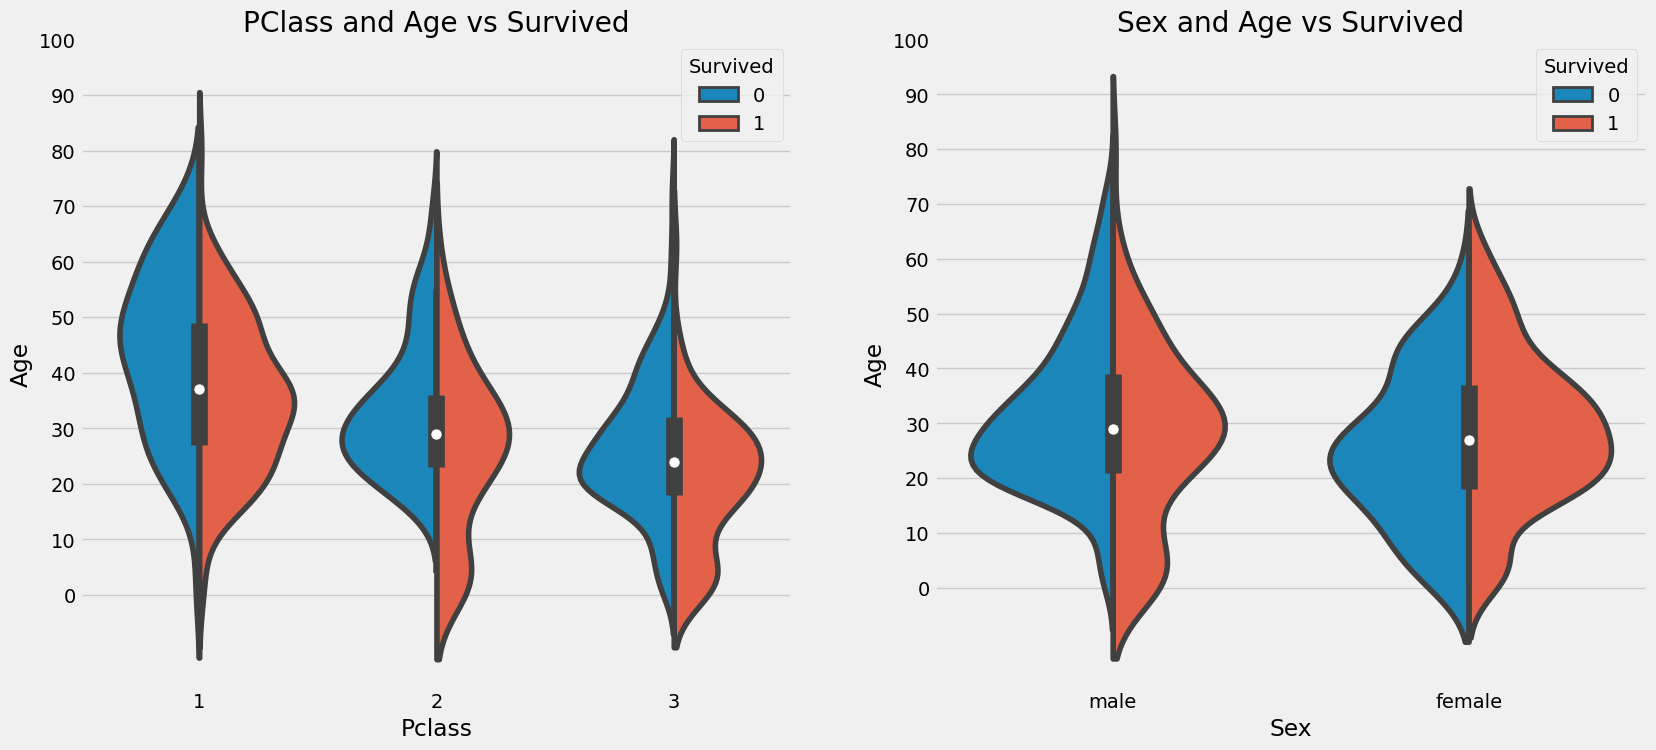

In [115]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data_train,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot(x="Sex",y="Age", hue="Survived", data=data_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [116]:
data_train['Initial']=0
for i in data_train:
    data_train['Initial']=data_train.Name.str.extract('([A-Za-z]+)\.') 

In [117]:
pd.crosstab(data_train.Initial,data_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [118]:
data_train.groupby('Initial')['Age'].mean()


Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [119]:
data_train.Age.isnull().any()

True

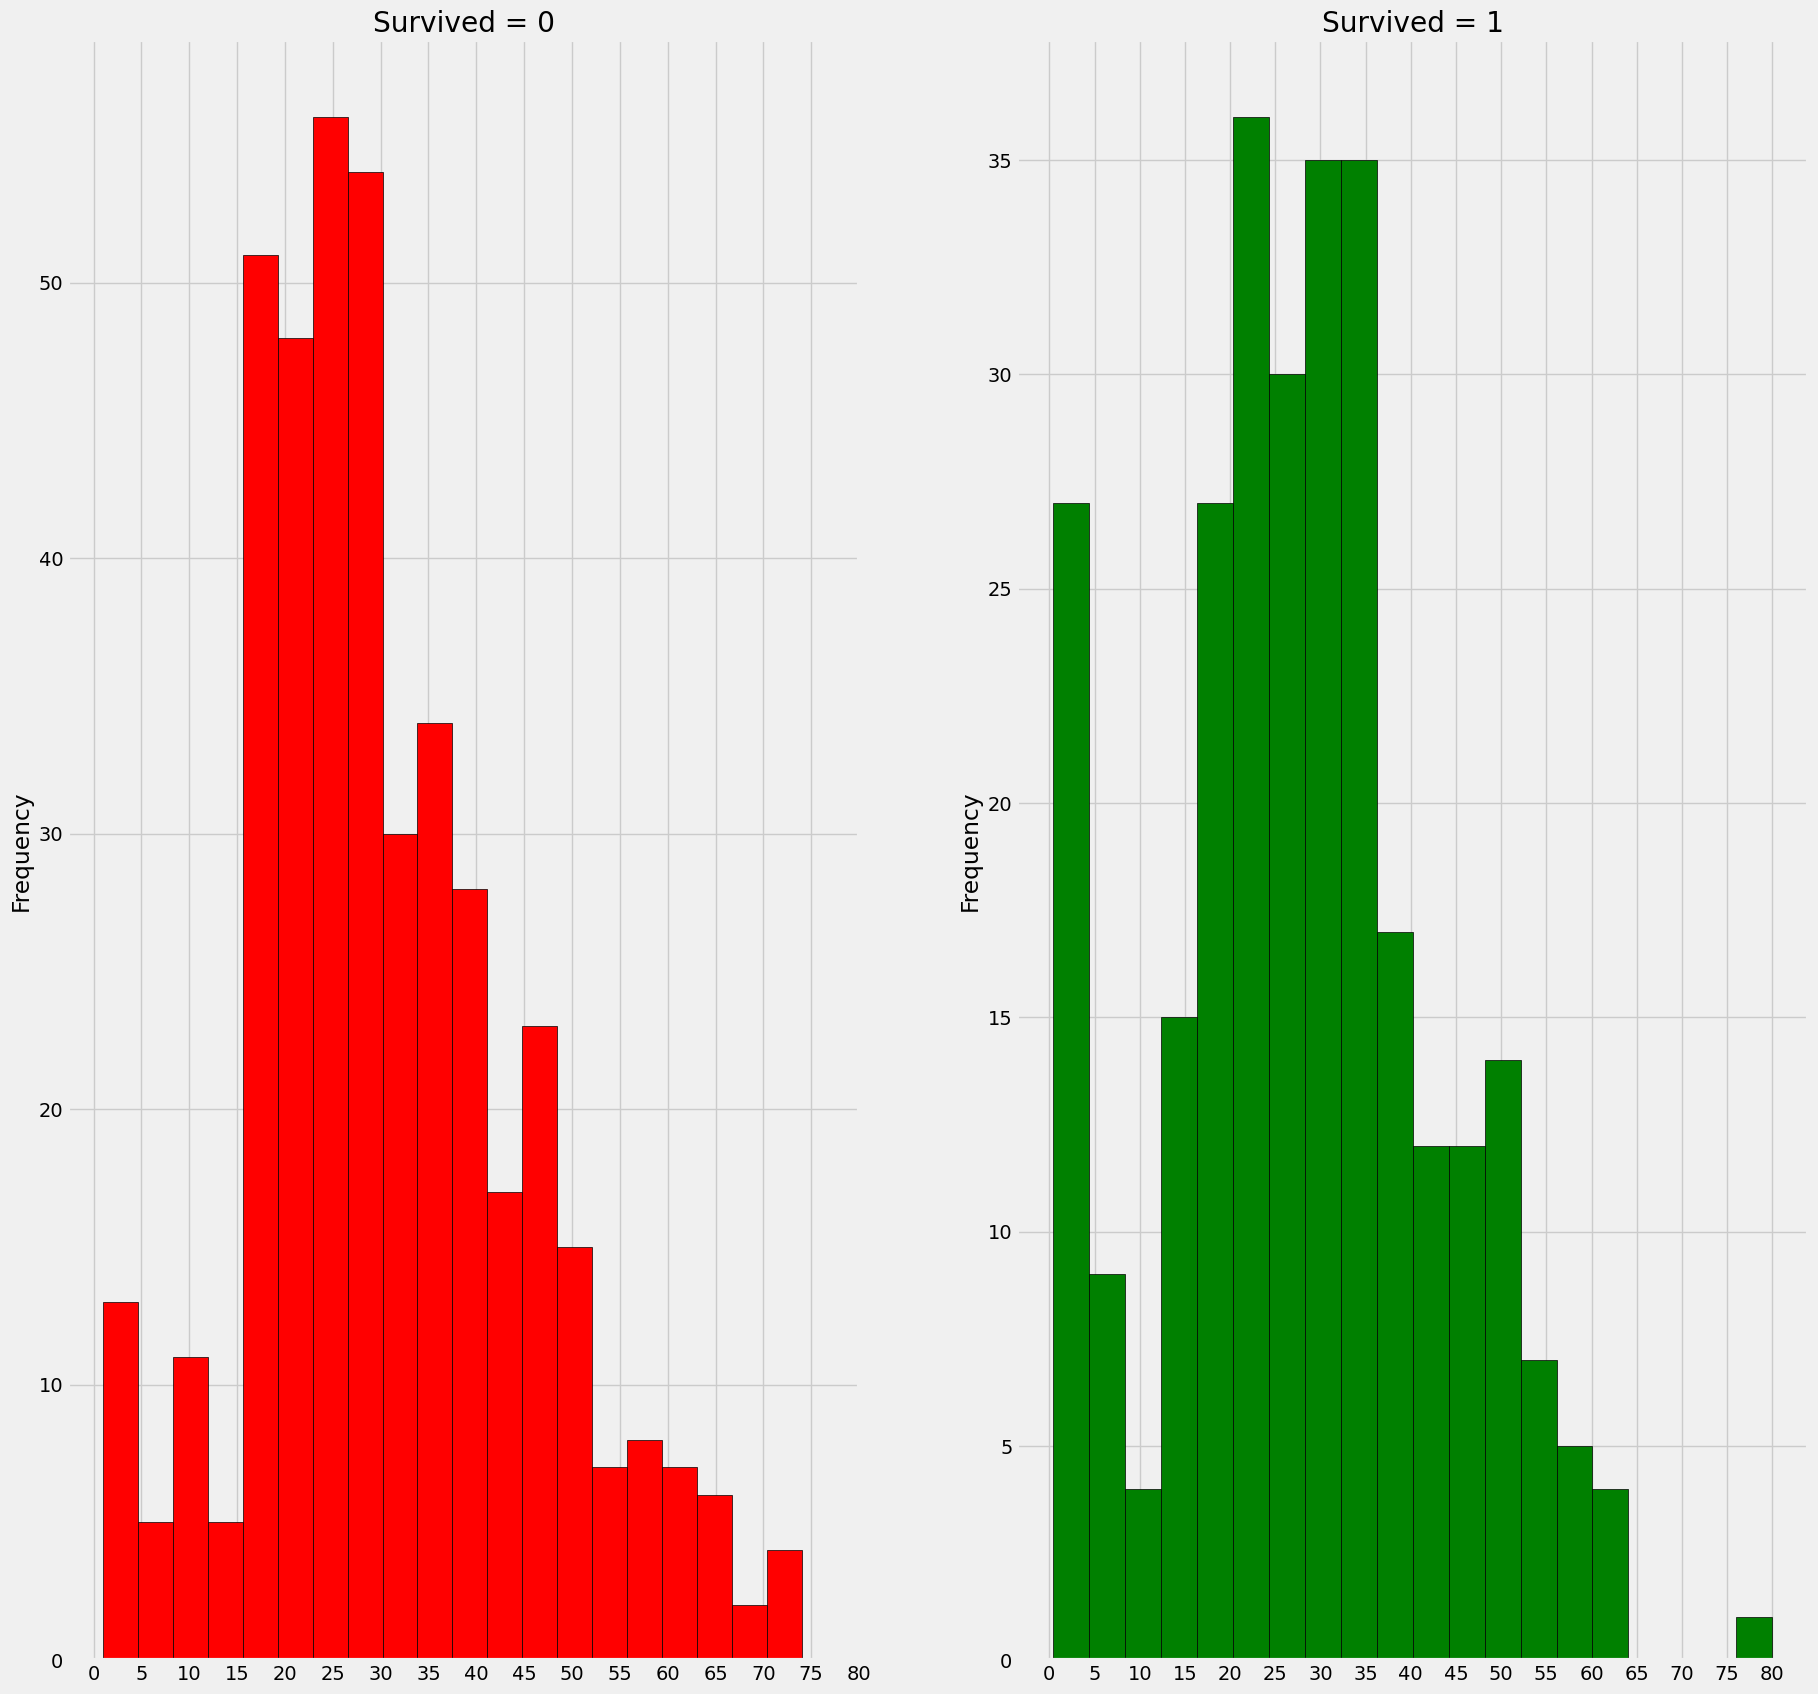

In [120]:
f,ax=plt.subplots(1,2,figsize=(20,20))
data_train[data_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data_train[data_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_axis_labels'

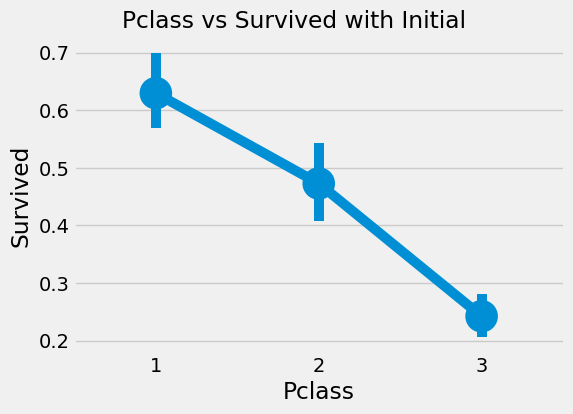

In [121]:
g = sns.PairGrid(data_train, y_vars="Survived", x_vars="Pclass", height=4, aspect=1.5)
g.map(sns.pointplot)
g.fig.suptitle('Pclass vs Survived with Initial', y=1.02)
g.set_axis_labels("Pclass", "Survived")

plt.show()


# Plotting Barplot & PairGrid

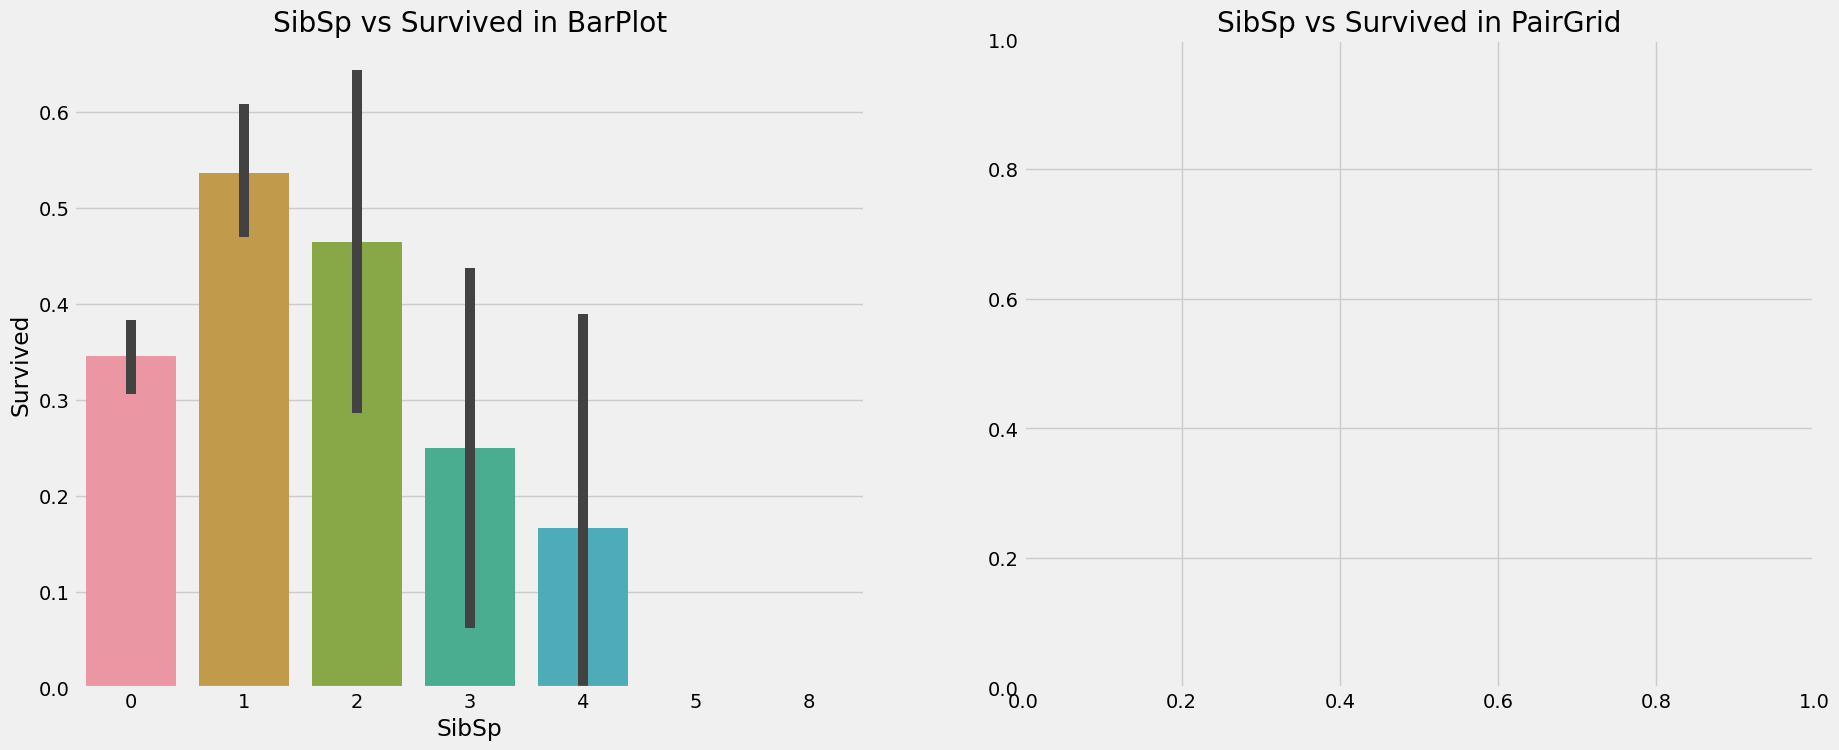

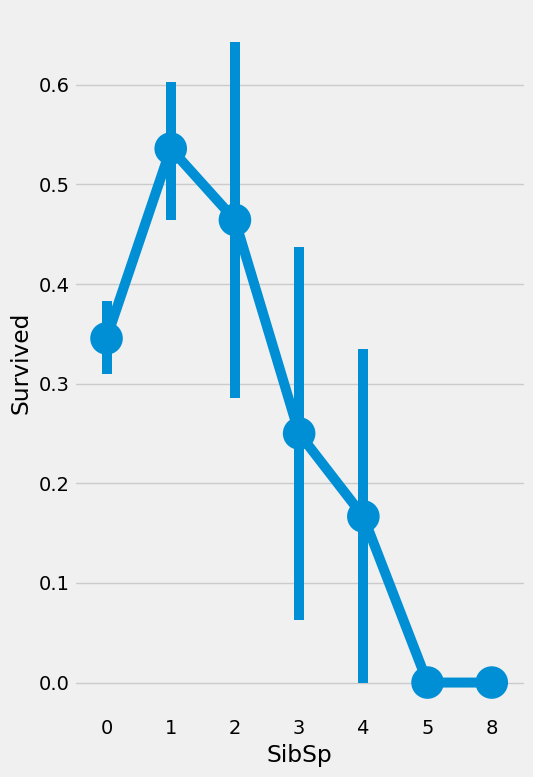

In [122]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='SibSp', y='Survived', data=data_train, ax=ax[0])
ax[0].set_title('SibSp vs Survived in BarPlot')
pair_grid = sns.PairGrid(data_train, x_vars=['SibSp'], y_vars=['Survived'], height=8, aspect=0.7)
pair_grid.map(sns.pointplot)
ax[1].set_title('SibSp vs Survived in PairGrid')

plt.show()
